In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from pylab import *

In [2]:
def generate_camber_points_userdef(x_val,camb_func):
    y_val = np.array([camb_func(x) for x in x_values])
    return y_val

In [3]:
def separate_digits(number):
    number_str = str(number)
    w = int(number_str[0])/100
    x = int(number_str[1])/10
    y = int(number_str[2])
    z = int(number_str[3])
    return w, x, y, z



In [4]:
def camber_line_function(x, m, p):
    
    if 0 <= x < p:
        return (m / (p**2)) * (2 * p * x - x**2)
    
    elif p <= x <= 1:
        return (m / (1 - p)**2) * ((1 - 2 * p) + 2 * p * x - x**2)

In [5]:
#NACA input is array
def camber_line_slope(x):
    slopes=np.zeros(n)
    for i in range(n-1):
        if 0 <= x[i] < p:
            slopes[i] = (m / (p**2)) * (2 * p - 2 * x[i])
        elif p <= x[i] <= 1:
            slopes[i] = (m / (1 - p)**2) * (2 * p - 2 * x[i])
    return slopes


In [6]:
#User defined -for slope at any point
def camber_slope_user(x, my_camber):
   
    y1 = my_camber(x - lemda)
    y2 = my_camber(x + lemda)
    slope_ = (y2 - y1) / (2 * lemda)

    return slope_

In [7]:
#NACA input is point
def camb_line_slope(rr):
    if 0 <= rr < p:
        slope_ = (m / (p**2)) * (2 * p - 2 * rr)
    elif p <= rr <= 1:
        slope_ = (m / (1 - p)**2) * (2 * p - 2 * rr)
    return slope_

In [8]:
def theta_(k):
    thetaa = np.zeros(k)
    for i in range(k):
        thetaa[i] = np.arccos(1-2*x_values[i])
    return thetaa


In [9]:
def compute_A_n(nf):
    cos_array=np.zeros(1000)
    
    for i in range(1000):
        cos_array[i] = cos((nf)*theta[i])
    
    y = slope * cos_array 

    ans = 0 
    
   
    for i in range(999):
        temp = (theta[i + 1] - theta[i]) * (y[i] + y[i + 1]) * 0.5
        ans += temp
    
    if nf==0:
        A_n = (alpha_deg)*(math.pi/180) - (1/math.pi)* ans
    else:
        A_n = (2/math.pi)*ans
    return A_n

In [10]:
def compute_cl(adp):
    cl = 3.14*(2*A[0] + A[1])
    return cl

In [11]:
def compute_c_m():
    C_m=(-3.14/2)*(A[0]+A[1]-(0.5*A[2]))
    return C_m

In [12]:
def dthetaa(s):
    for i in range(s-1):
        dtheta[i] = theta[i+1] - theta[i]
    dtheta[n-1]=dtheta[0]
    return dtheta


In [13]:
def create_A_n_sin(n):
    sumarray=np.zeros(n+1)
    for i in range(n):
        for j in range(n+1):
            if j == 0:
                continue
            else:
                sumarray[i] = sumarray[i] + A[j]*np.sin((j)*theta[i])
    return sumarray



In [14]:
def gamma_sin(U_inf,nu,alpha_degr):
    cos_array = np.cos(theta)
    sin_array = np.sin(theta)
    gammareq = []
    
    for i in range(1,n):
        gammareq.append(2*U_inf*((A[0])*((1 + cos_array[i])/sin_array[i]) + (sumarray[i])))
    gammareq=np.array(gammareq)
    return gammareq


In [15]:
def gamma_total(alpha):
    integrand = gamma_sin(U_infi,n,alpha)
    circulation = 0
    for i in range(1,n-1):
        temp = (theta[i] - theta[i-1]) * (integrand[i] * np.sin(theta[i])) * 0.5
        circulation += temp
    return circulation

In [16]:
def velocity(x_values,y_values):
    x_box = np.linspace(-1.5, 2.5, t)
    y_box = np.linspace(-1.5, 1.5, t)
    x_mesh, y_mesh = np.meshgrid(x_box, y_box)
    dx=x_values[4]-x_values[3]
    v_x = np.zeros((t,t))
    v_y = np.zeros((t,t))
    r_x = np.zeros(n)
    r_y = np.zeros(n)
    r = np.zeros(n)
    ds = np.zeros(n)
    for i in range(t):
        for k in range(t):
            for j in range(n-1):
                r_x[j] = -x_mesh[k][i] + x_values[j] 
                r_y[j] = y_mesh[k][i] - y_values[j]
                r[j] = math.sqrt(r_x[j]*r_x[j] + r_y[j]*r_y[j])
                
                if choice in ['y','Y']:
                    ds[j] = math.sqrt(1+camb_line_slope(x_values[j])**2)*(dx) 
                    
                elif choice in ['n','N']:
                    ds[j] = math.sqrt(1+camber_slope_user(x_values[j], d_camber)**2)*(dx)
    
                v_x[k][i] = v_x[k][i] + (((r_y[j]) * gamma_[j]*ds[j])/(2*np.pi*r[j]**2))
                v_y[k][i] = v_y[k][i] + (((r_x[j]) * gamma_[j]*ds[j])/(2*np.pi*r[j]**2))


    u_x = U_infi*np.cos((alpha_deg)*(np.pi/180))
    u_y = U_infi*np.sin((alpha_deg)*(np.pi/180))

    for i in range(t):
        for j in range(t):
            v_x[j][i] = v_x[j][i] + u_x
        
    for i in range(t):
        for j in range(t):
            v_y[j][i] = v_y[j][i] + u_y

    plt.figure(figsize=(8, 6))
    plt.quiver(x_mesh, y_mesh, v_x, v_y, scale=1000,width = 0.002, color='black', pivot='mid')
    
    if choice in ['y']:
        plt.plot(x_values, y_values, label=f'NACA Camber Line (m={m}, p={p})', color='blue')
        plt.title('Camber Line for NACA 4-digit Series Airfoil')
    
    elif choice in ['n']:
        plt.plot(x_values, y_values, label='User-Defined Camber Line', color='green')
        plt.title('User-Defined Camber Line')
    
    plt.plot(x_values, y_values,color='blue')
    plt.title('Vector Field around Airfoil')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.show()
    return v_x,v_y

In [17]:
def circulation_line_integral(g):
    
    u_x = U_infi*np.cos((alpha_deg*np.pi)/180)
    u_y = U_infi*np.sin((alpha_deg*np.pi)/180)
    

    dis_x=float(4/(g-1))
    dis_y=3/(g-1)
    
    vds=0
    for i in range(g):
        vds = vds + (1)*((v_x[-1][i]))*dis_x
    for i in range(g):
        vds = vds + (-1)*((v_y[i][-1]))*dis_y
    for i in range(g):
        vds = vds + (-1)*((v_x[0][i]))*dis_x
    for i in range(g):
        vds = vds + (1)*((v_y[i][0]))*dis_y
    
    
    return vds

Give y for NACA or n for User definedn
Enter your custom camber line equation as a valid Python expression in terms of 'x': -2*x*(x-1)
Give x-coordinate of point at which you want to determine slope0.31


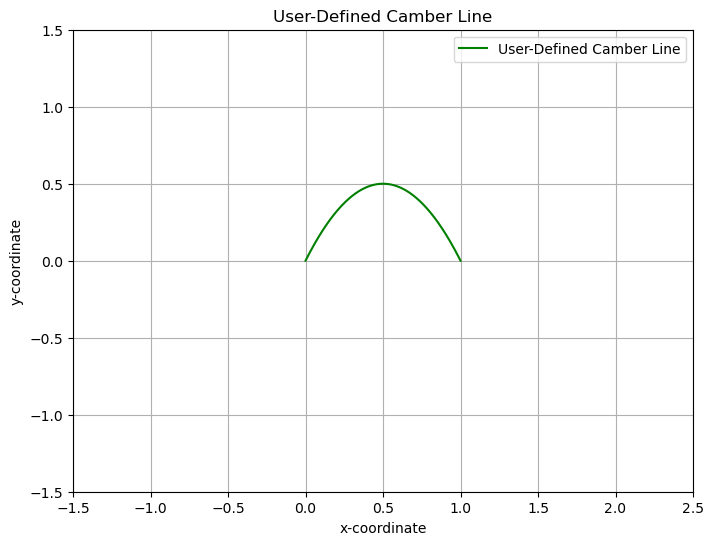

Give velocity at far point 30
Give alpha in degrees 3


In [20]:
# INPUT CELL
choice=input("Give y for NACA or n for User defined")
n=1000
if choice in ['y']:
    a = int(input("Give me Airfoil no. as NACA 4 series "))
    x_values=np.linspace(0,1,n)
    y_values = np.zeros(n)
    m,p,c,d = separate_digits(a)
    for i in range(n):
        y_values[i]=camber_line_function(x_values[i],m,p)
    
    slope=camber_line_slope(x_values)
    slope[999]=camb_line_slope(1.0)
    xs=float(input("Give x-coordinate of point at which you want to determine slope"))
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label=f'NACA Camber Line (m={m}, p={p})', color='blue')
    plt.title('Camber Line for NACA 4-digit Series Airfoil')
    plt.xlim(-1.5,2.5)
    plt.ylim(-1.5,1.5)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

    
elif choice in ['n']:
    # User-defined camber line function
    x_values=np.linspace(0,1,n)
    lemda=1e-6
    camb_equation = input("Enter your custom camber line equation as a valid Python expression in terms of 'x': ")
    
    # Define the custom camber function using the user's input
    d_camber = lambda x: eval(camb_equation, {'x': x})
    y_values = generate_camber_points_userdef(x_values, d_camber)
    slope=np.zeros(n)
    for i in range(n):
        slope[i]=camber_slope_user(x_values[i],d_camber)
        
    xs=float(input("Give x-coordinate of point at which you want to determine slope"))
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='User-Defined Camber Line', color='green')
    plt.title('User-Defined Camber Line')
    plt.xlim(-1.5,2.5)
    plt.ylim(-1.5,1.5)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

    

t=30
U_infi=int(input("Give velocity at far point "))
alpha_deg=(float(input("Give alpha in degrees ")))

Slope at point  0.31  is  0.7599999999885476
Coefficient of lift is  6.608415755816813
Bound Circulation is  99.17339401226957


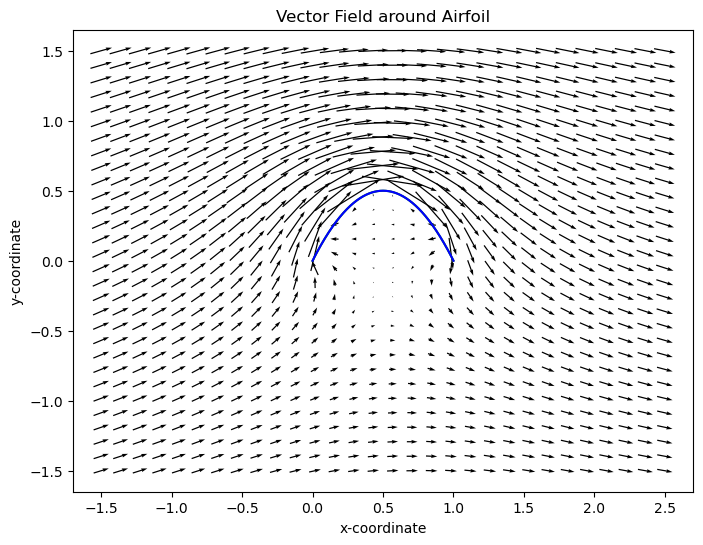

Circulation through Line integral 140.44090284425317


In [21]:
#commands

if choice in ['y','Y']:
    print("Slope at x-coordinate ", xs," is ",camb_line_slope(xs))
if choice in ['n','N']:
    print("Slope at point ", xs," is ",camber_slope_user(xs,d_camber))

theta=theta_(n)

A=np.zeros(n+1)
for i in range(n+1):
    A[i]=compute_A_n(i)
    
    
dtheta=np.zeros(n)
dtheta=dthetaa(n)

sumarray=create_A_n_sin(n)
gamma_=gamma_sin(U_infi,n,alpha_deg)

clift=compute_cl(alpha_deg)
print("Coefficient of lift is ",clift)

print("Bound Circulation is ",gamma_total(alpha_deg))

v_x,v_y=velocity(x_values,y_values)
print("Circulation through Line integral",circulation_line_integral(t))
